In [2]:
import pandas as pd

In [33]:
file_paths = {
    "efficientnet_b1": "data/baseline_efficientnet_b1_dev.txt",
    "googlenet": "data/baseline_googlenet_dev.txt",
    "mobilenet_v2": "data/baseline_mobilenet_v2_dev.txt",
    "mobilenet_v3": "data/baseline_mobilenet_v3_small_dev.txt",
    "resnet18": "data/baseline_resnet18_dev.txt",
    "shufflenet_v2": "data/baseline_shufflenet_v2_x1_0_dev.txt",
}

In [34]:
# Dictionary untuk menyimpan data dari semua file
data_dict = {"Epoch": []}

In [36]:
# Membaca dan parsing setiap file
for model_name, path in file_paths.items():
    epochs = []
    percentages = []
    
    try:
        with open(path, "r") as file:
            for line in file:
                parts = line.strip().split(", dev ")
                if len(parts) == 2:
                    epoch_part = parts[0].split("Epoch ")[-1]
                    percentage_part = parts[1].replace("%", "")

                    try:
                        epoch = int(epoch_part)
                        percentage = float(percentage_part)
                        epochs.append(epoch + 1)
                        percentages.append(percentage)
                    except ValueError:
                        continue  # Lewati jika parsing gagal

        # Pastikan epoch hanya disimpan sekali
        if not data_dict["Epoch"]:
            data_dict["Epoch"] = epochs

        # Simpan data untuk model ini
        data_dict[model_name] = percentages

    except FileNotFoundError:
        print(f"File {path} tidak ditemukan, dilewati.")

# Membuat DataFrame
df = pd.DataFrame(data_dict)

In [39]:
df.head(25)

,Epoch,efficientnet_b1,googlenet,mobilenet_v2,mobilenet_v3,resnet18,shufflenet_v2
0,1,89.09,88.18,87.73,100.00,86.82,88.18
1,2,63.18,43.18,62.27,69.55,32.73,46.82
2,3,30.45,17.27,22.27,39.55,10.45,24.09
3,4,27.27,34.55,21.36,21.82,11.82,24.55
4,5,17.27,14.09,30.91,17.73,12.73,21.82
5,6,15.00,10.45,35.91,44.55,10.45,14.09
6,7,15.45,10.45,28.64,28.18,14.55,18.18
7,8,16.82,9.09,22.73,31.82,10.91,27.27
8,9,16.82,6.82,22.73,31.36,8.64,11.36
9,10,16.36,6.82,22.27,34.55,15.00,12.73


In [38]:
df.tail()

,Epoch,efficientnet_b1,googlenet,mobilenet_v2,mobilenet_v3,resnet18,shufflenet_v2
20,21,13.64,10.00,4.55,17.27,6.82,16.36
21,22,14.55,9.55,7.27,18.64,4.55,14.09
22,23,14.55,10.91,6.36,17.73,3.18,12.73
23,24,14.55,11.82,8.18,18.64,5.00,12.73
24,25,14.55,10.45,4.09,17.27,4.09,13.64


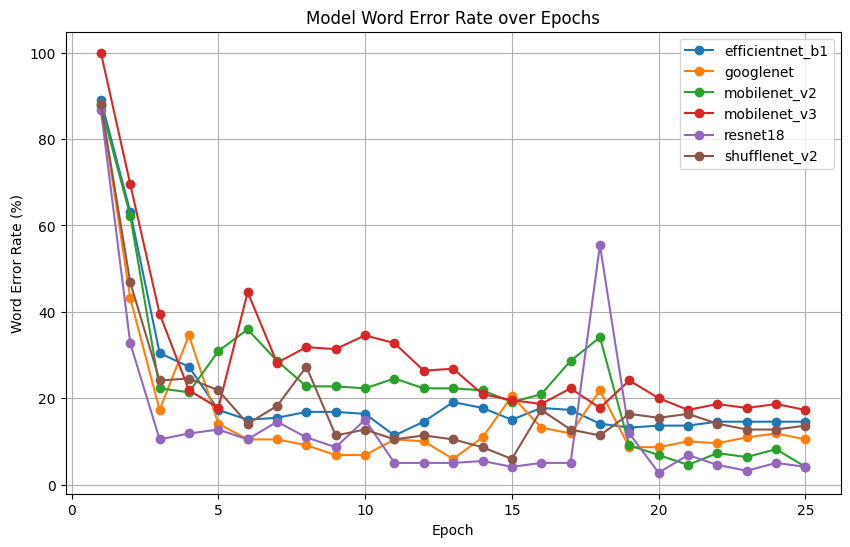

In [43]:
import matplotlib.pyplot as plt

# Membuat grafik untuk setiap model pretrain
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:  # Mulai dari indeks 1 untuk menghindari kolom 'Epoch'
    plt.plot(df["Epoch"], df[col], marker='o', label=col)
    
# Menyesuaikan tampilan plot
plt.xlabel("Epoch")
plt.ylabel("Word Error Rate (%)")
plt.title("Model Word Error Rate over Epochs")
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

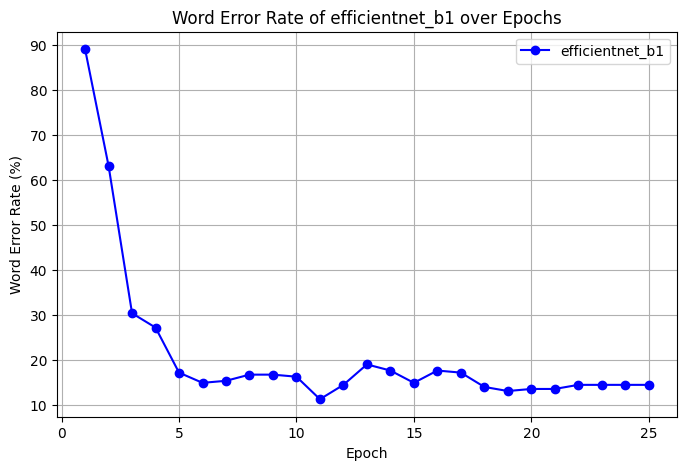

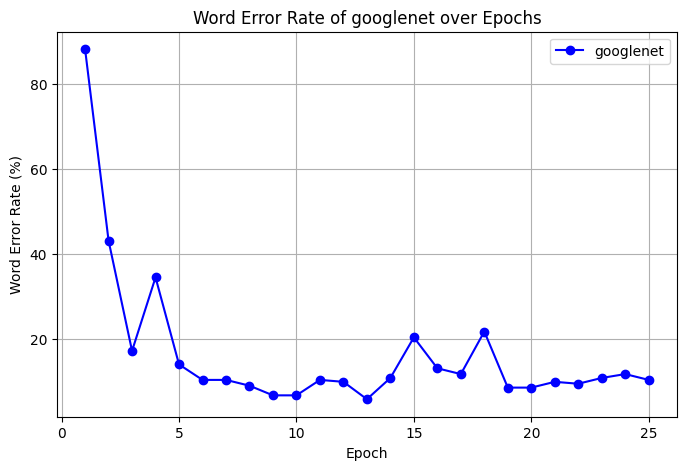

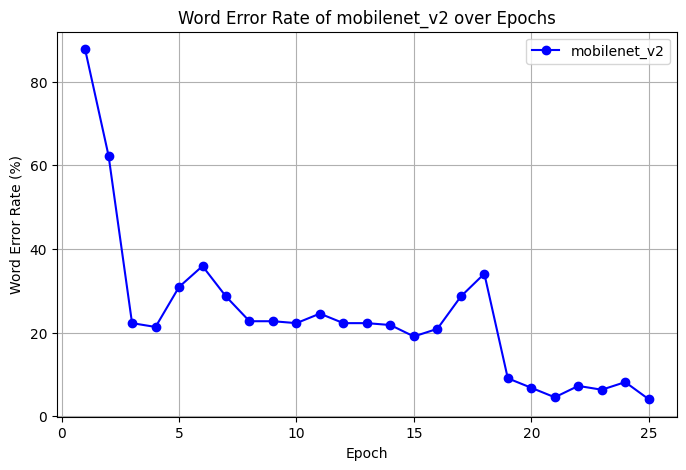

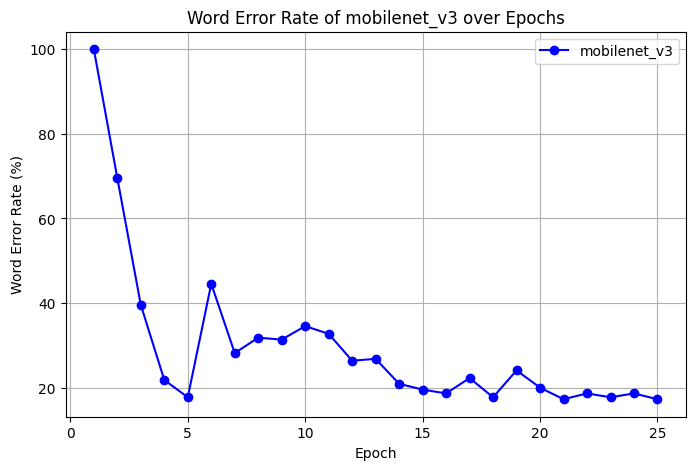

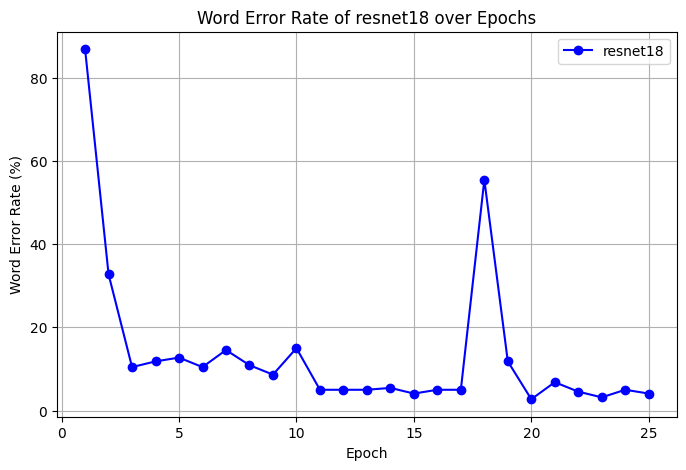

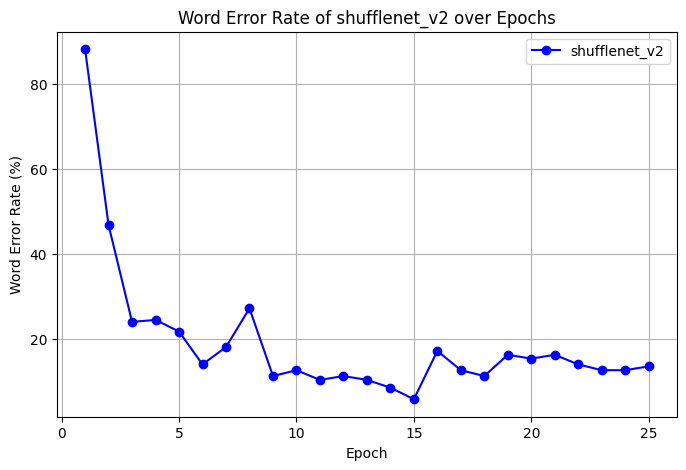

In [44]:
# Membuat grafik terpisah untuk setiap model pretrain
for col in df.columns[1:]:  # Mulai dari indeks 1 untuk menghindari kolom 'Epoch'
    plt.figure(figsize=(8, 5))
    plt.plot(df["Epoch"], df[col], marker='o', linestyle='-', label=col, color='b')
    
    # Menyesuaikan tampilan plot
    plt.xlabel("Epoch")
    plt.ylabel("Word Error Rate (%)")
    plt.title(f"Word Error Rate of {col} over Epochs")
    plt.legend()
    plt.grid(True)
    
    # Menampilkan grafik
    plt.show()
